In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

In [7]:
# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


# 災害の分析
世界中で起きている災害について分析しました。
まず最初に災害が起こった地点をマップにまとめました。

In [10]:
# 1. データの読み込み
file_path = "emdat.csv"
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"エラー: ファイルが見つかりません。'{file_path}'がスクリプトと同じフォルダにあるか確認してください。")
    exit()

# 2. データの前処理
# 緯度・経度を数値型に変換し、変換できない値は欠損値（NaN）とする
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# 緯度と経度が有効な値を持つ行のみを抽出（地図にプロットできるデータのみ）
plot_df = df.dropna(subset=['Latitude', 'Longitude']).copy()

# 3. 地図の初期化 (災害地点の平均座標を中心とする)
if not plot_df.empty:
    center_lat = plot_df['Latitude'].mean()
    center_lon = plot_df['Longitude'].mean()
else:
    # データがない場合は世界地図の中心（赤道ギニア）を初期値とする
    center_lat = 0
    center_lon = 0
    print("注意: プロット可能な災害地点（緯度・経度情報があるデータ）が見つかりませんでした。")

m = folium.Map(location=[center_lat, center_lon], zoom_start=2)

# 4. 各災害地点を地図にマーカーとして追加
for index, row in plot_df.iterrows():
    
    # isna()でNaNかどうかをチェック
    if pd.isna(row['Total Deaths']):
        deaths_display = "データなし"
    else:
        # NaNでなければ整数に変換
        deaths_display = int(row['Total Deaths'])
    
    # ポップアップに表示する情報を整形
    popup_html = f"""
    <b>国:</b> {row['Country']}<br>
    <b>災害タイプ:</b> {row['Disaster Type']}<br>
    <b>サブタイプ:</b> {row['Disaster Subtype']}<br>
    <b>発生年:</b> {row['Start Year']}<br>
    <b>総死者数:</b> {deaths_display}
    """
    
    # ... (folium.Markerのコードは省略)
    
    # ... (folium.Markerのコードは省略)

# 5. 地図をHTMLファイルとして保存
output_file = "disaster_map.html"
m.save(output_file)

print("-" * 30)
print(f"✅ 地図の作成が完了しました。")
print(f"ファイル名: {output_file}")
print(f"プロットされた災害件数: {len(plot_df)}件")
print("-" * 30)

------------------------------
✅ 地図の作成が完了しました。
ファイル名: disaster_map.html
プロットされた災害件数: 2797件
------------------------------


しかし、ファイルに保存できただけで表示されませんでした。

In [2]:
pip install pandas matplotlib cartopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


気を取り直して表示されるようにやり直しました


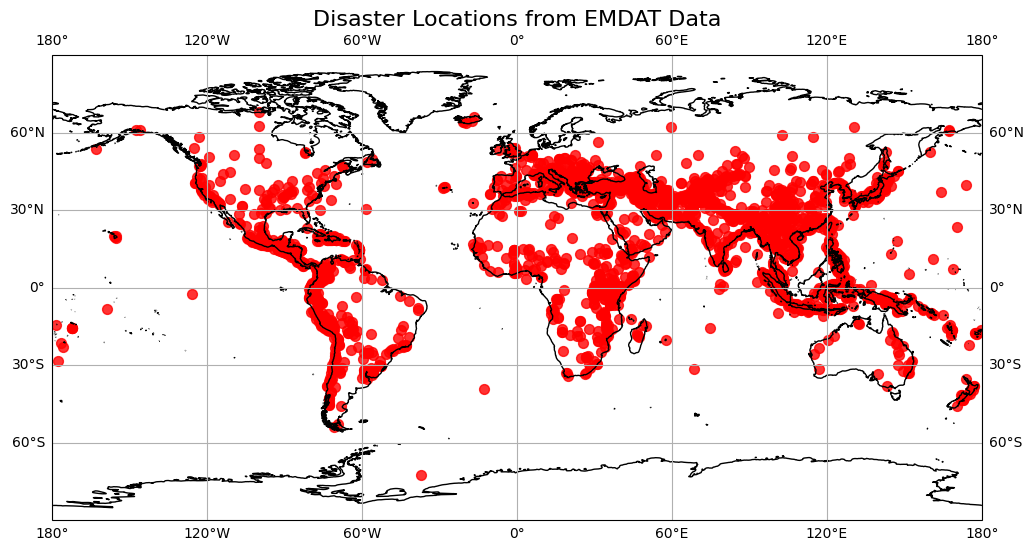

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# -----------------------------------------------------
# 1. データの前処理 (以前のステップで実施した内容を簡略化)
# -----------------------------------------------------
file_path = "emdat.csv"
df = pd.read_csv(file_path)

# LatitudeとLongitudeを数値型に変換し、欠損値がある行を削除
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
plot_df = df.dropna(subset=['Latitude', 'Longitude']).copy()

# -----------------------------------------------------
# 2. MatplotlibとCartopyを使った地図の描画
# -----------------------------------------------------
# 描画オブジェクトを作成
fig = plt.figure(figsize=(12, 8))

# 地図の投影法を設定 (今回はプレートカリー図法を使用)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 地図の描画
ax.coastlines(resolution='50m')
ax.set_global() # 全世界を表示

# グリッド線と目盛りを表示 (任意)
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# 災害地点をプロット
# s: マーカーサイズ, color: 色, marker: マーカー形状, transform: 座標系
ax.scatter(
    plot_df['Longitude'], 
    plot_df['Latitude'], 
    s=50, 
    color='red', 
    marker='o',
    alpha=0.8, # 透明度
    transform=ccrs.PlateCarree(),
    label='Disaster Location'
)

# タイトル
plt.title('Disaster Locations from EMDAT Data', fontsize=16)

# プロットを表示
# VS Codeの「プロットビュー」または実行環境のポップアップウィンドウに画像が表示されます。
plt.show()

地図上に赤い丸で表すことができました。
しかし、赤丸だけでは見ずらいですね。
なので今度は色を付けてみようと思います。

C:\Users\twinz\AppData\Local\Temp\ipykernel_12040\3237150064.py:43: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 5
  legend1 = ax.legend(
C:\Users\twinz\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32239 (\N{CJK UNIFIED IDEOGRAPH-7DEF}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\twinz\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\twinz\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 32076 (\N{CJK UNIFIED IDEOGRAPH-7D4C}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\twinz\AppData\Roaming\Python\Python313\site-packages\IPython\core\events.py:82: UserWarning: Glyph 28797 (\N{CJK UNIFIED IDEOGRAPH-707D}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:

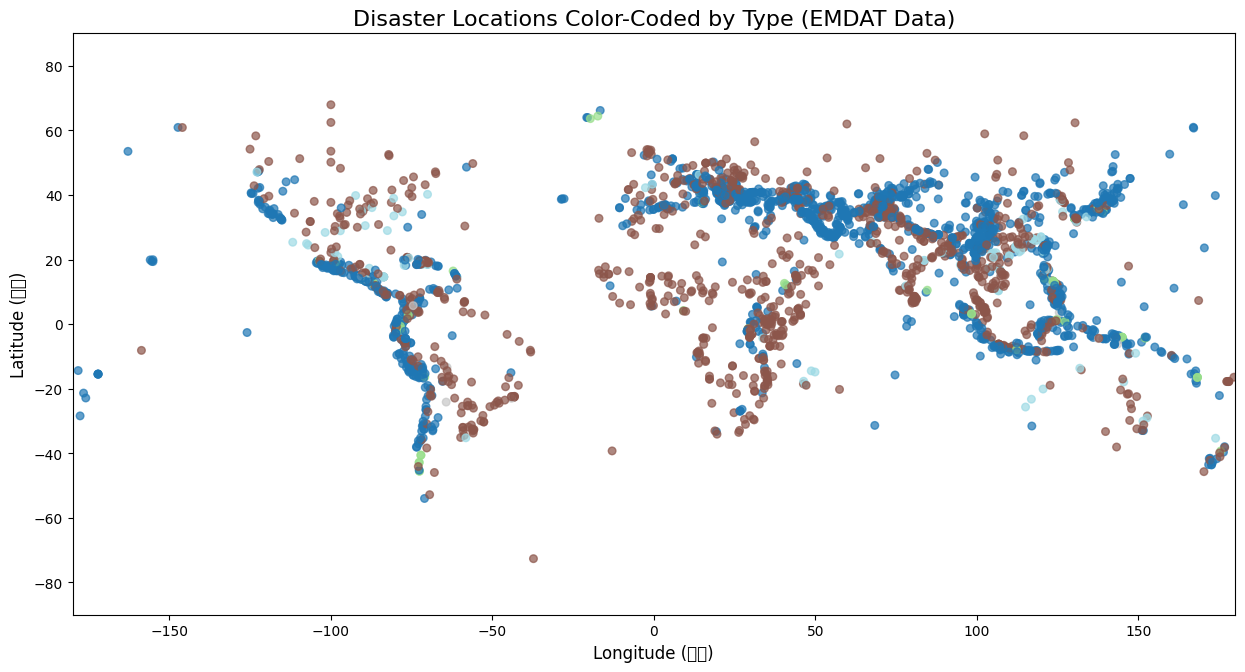

In [5]:
# ファイルパス
file_path = "emdat.csv"

# 1. データの前処理
df = pd.read_csv(file_path)

# LatitudeとLongitudeを数値型に変換し、欠損値がある行を削除
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
plot_df = df.dropna(subset=['Latitude', 'Longitude']).copy()

# 災害の種類を示す列名を設定
DISASTER_COLUMN = 'Disaster Type'

# 2. 災害タイプごとの色分け準備
# 災害タイプ（文字列）を数値コードに変換し、色分けに利用できるようにする
plot_df['Disaster_Code'], unique_disasters = pd.factorize(plot_df[DISASTER_COLUMN])
num_disasters = len(unique_disasters)

# 3. Matplotlibを使った色分け散布図の描画
fig, ax = plt.subplots(figsize=(15, 10))

# 散布図を描画
# c: 色の基準となる数値コード, cmap: 使用するカラーマップ
scatter = ax.scatter(
    plot_df['Longitude'], 
    plot_df['Latitude'], 
    s=30, # マーカーサイズ
    c=plot_df['Disaster_Code'], 
    cmap='tab20', # 20色までの異なる色を使いやすいカラーマップ
    alpha=0.7 # 透明度
)

# 軸ラベルの設定
ax.set_xlabel('Longitude (経度)', fontsize=12)
ax.set_ylabel('Latitude (緯度)', fontsize=12)

# タイトル
plt.title('Disaster Locations Color-Coded by Type (EMDAT Data)', fontsize=16)

# 凡例の作成
# 凡例ハンドルとラベル（災害タイプ名）を取得し、図の外側に配置
legend1 = ax.legend(
    # scatter.legend_elements()で凡例に必要なマーカーと色の情報を取得
    handles=scatter.legend_elements(num=num_disasters)[0], 
    labels=unique_disasters.tolist(),
    loc='lower left', 
    bbox_to_anchor=(1.02, 0), # 図の外側に配置
    title='Disaster Type (災害の種類)',
    fontsize=8
)
ax.add_artist(legend1) # 凡例を追加

# 緯度・経度の範囲調整（世界地図のように見えるように）
ax.set_xlim(-180, 180)
ax.set_ylim(-90, 90)
ax.set_aspect('equal', adjustable='box') # 縦横比を調整

# プロットを表示（実行環境によっては不要ですが、ローカルでの実行用に残します）
# plt.show() 

# 画像をファイルに保存
# plt.savefig('disaster_map_color_coded_basic.png', bbox_inches='tight')

やってみましたが、地図がうまく表示されませんでした。
もう一度やってみましょう

In [6]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import cartopy.crs as ccrs
print("Cartopyのインポートに成功しました。")

Cartopyのインポートに成功しました。


C:\Users\twinz\AppData\Local\Temp\ipykernel_12040\1916014395.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_disasters)
c:\Users\twinz\AppData\Local\Programs\Python\Python313\Lib\site-packages\cartopy\mpl\geoaxes.py:509: UserWarning: Glyph 28797 (\N{CJK UNIFIED IDEOGRAPH-707D}) missing from font(s) DejaVu Sans.
  return super().draw(renderer=renderer, **kwargs)
c:\Users\twinz\AppData\Local\Programs\Python\Python313\Lib\site-packages\cartopy\mpl\geoaxes.py:509: UserWarning: Glyph 23475 (\N{CJK UNIFIED IDEOGRAPH-5BB3}) missing from font(s) DejaVu Sans.
  return super().draw(renderer=renderer, **kwargs)
c:\Users\twinz\AppData\Local\Programs\Python\Python313\Lib\site-packages\cartopy\mpl\geoaxes.py:509: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s)

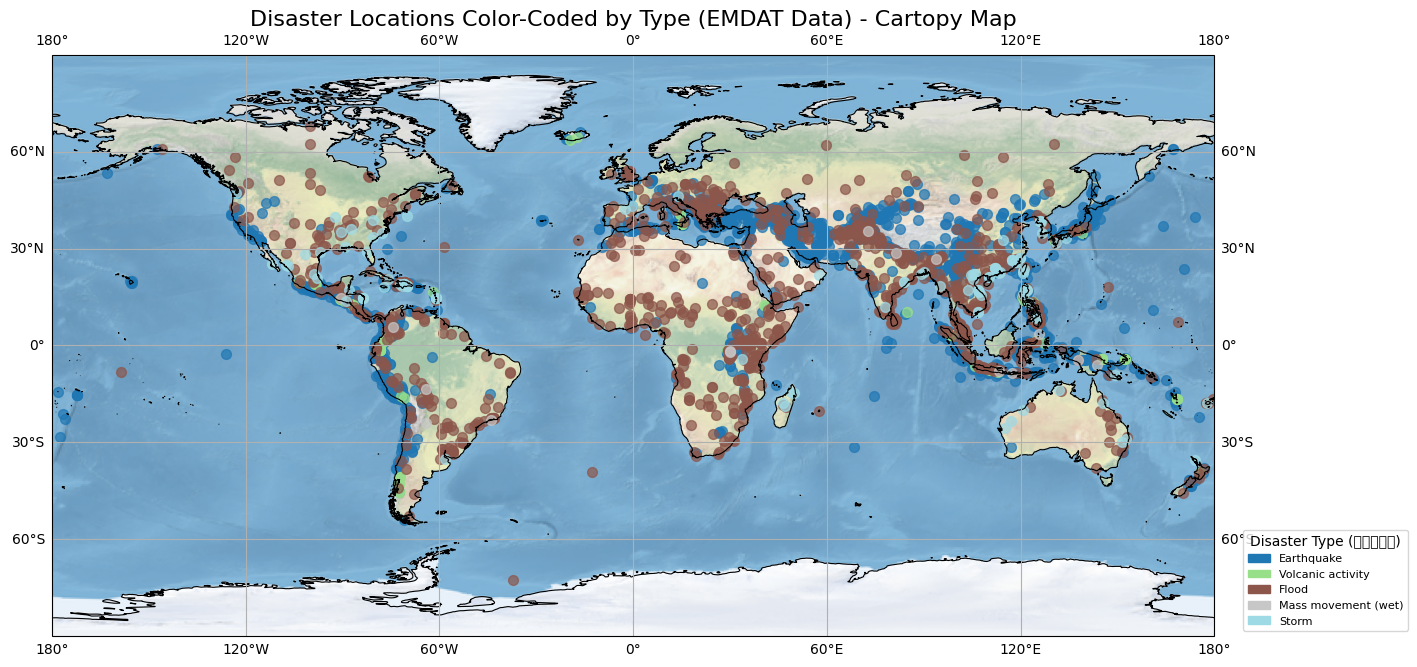

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 
import matplotlib.patches as mpatches # ★ 凡例作成用のモジュールを追加
import numpy as np

# --- 1. 定数とファイルパス ---
file_path = "emdat.csv"
DISASTER_COLUMN = 'Disaster Type'

# --- 2. データの前処理と色分け準備 ---
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("エラー: 'emdat.csv'ファイルが見つかりません。パスを確認してください。")
    raise

# LatitudeとLongitudeを数値型に変換し、欠損値がある行を削除
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
plot_df = df.dropna(subset=['Latitude', 'Longitude']).copy()

# 災害タイプを数値コードに変換し、色分けに利用できるようにする
plot_df['Disaster_Code'], unique_disasters = pd.factorize(plot_df[DISASTER_COLUMN])
num_disasters = len(unique_disasters)

# --- 3. MatplotlibとCartopyを使った地図の描画 ---

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 地図の描画
ax.coastlines(resolution='50m', color='black', linewidth=0.8)
ax.set_global() 
ax.stock_img()
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)

# --- 4. 災害タイプごとのプロットと凡例ハンドルの収集 ---
colors = plt.cm.get_cmap('tab20', num_disasters) 
legend_handles = [] # 凡例のハンドル（パッチ）を格納
legend_labels = []  # 凡例のラベル（災害タイプ名）を格納

for i, dtype in enumerate(unique_disasters):
    subset = plot_df[plot_df[DISASTER_COLUMN] == dtype]
    
    # データポイントがある場合のみプロットと凡例ハンドルの作成を行う
    if not subset.empty:
        # 災害地点をプロット
        ax.scatter(
            subset['Longitude'], 
            subset['Latitude'], 
            s=50, 
            color=colors(i), 
            marker='o',
            alpha=0.7,
            transform=ccrs.PlateCarree(),
        )
        
        # ★修正点: mpatches.Patchを使って、色とラベルから手動で凡例の要素（ハンドル）を作成
        patch = mpatches.Patch(color=colors(i), label=dtype)
        legend_handles.append(patch)
        legend_labels.append(dtype)


# タイトル
plt.title('Disaster Locations Color-Coded by Type (EMDAT Data) - Cartopy Map', fontsize=16)

# 凡例を地図の外側に配置 (手動で作成したハンドルとラベルを使用)
plt.legend(
    handles=legend_handles, 
    labels=legend_labels,
    loc='lower left', 
    bbox_to_anchor=(1.02, 0),
    title='Disaster Type (災害の種類)',
    fontsize=8
)

# 画像をファイルに保存 (ローカル実行用)
plt.savefig('disaster_map_cartopy.png', bbox_inches='tight')
plt.show()

どうでしょうか。
地震＝青
火山活動＝緑
洪水＝茶色
土砂災害＝白
暴風・嵐＝水色
色付けされて地図上に表すことができました。
これで少しは見やすくなったと思います

C:\Users\twinz\AppData\Local\Temp\ipykernel_12040\1141187943.py:64: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', num_disasters)


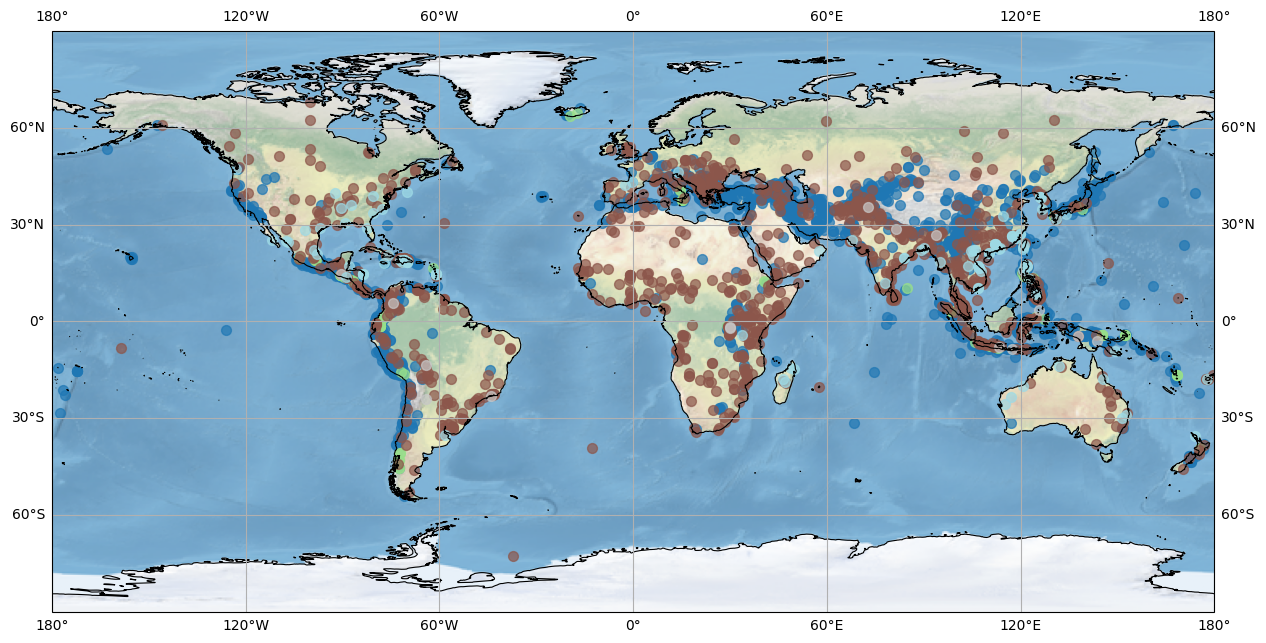

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 
import matplotlib.patches as mpatches 
import numpy as np

# --- 1. 定数とファイルパス ---
file_path = "emdat.csv"
DISASTER_COLUMN = 'Disaster Type'

# ★★★ 英語から日本語への変換辞書 ★★★
# EMDATデータの 'Disaster Type' に存在する可能性のある主要なカテゴリを翻訳します。
DISASTER_TRANSLATION = {
    'Storm': '暴風・嵐',
    'Flood': '洪水',
    'Earthquake': '地震',
    'Drought': '干ばつ',
    'Wildfire': '山火事',
    'Volcanic activity': '火山活動',
    'Epidemic': '伝染病',
    'Mass movement (dry)': '乾燥地帯の土砂移動',
    'Landslide': '地滑り',
    'Tsunami': '津波',
    'Extreme temperature': '異常高温・低温',
    'Other': 'その他',
    # データに存在する可能性のあるその他の主要なカテゴリを追加
    'Biological': '生物災害',
    'Geophysical': '地学的災害',
    'Hydrological': '水文的災害',
    'Meteorological': '気象災害',
    'Climatological': '気候的災害',
}

# --- 2. データの前処理と色分け準備 ---
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print("エラー: 'emdat.csv'ファイルが見つかりません。パスを確認してください。")
    raise

# LatitudeとLongitudeを数値型に変換し、欠損値がある行を削除
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')
plot_df = df.dropna(subset=['Latitude', 'Longitude']).copy()

# 災害タイプを数値コードに変換し、色分けに利用できるようにする
plot_df['Disaster_Code'], unique_disasters = pd.factorize(plot_df[DISASTER_COLUMN])
num_disasters = len(unique_disasters)

# --- 3. MatplotlibとCartopyを使った地図の描画 ---

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# 地図の描画
ax.coastlines(resolution='50m', color='black', linewidth=0.8)
ax.set_global() 
ax.stock_img()
# グリッド線のラベルも日本語で表示できるように、フォントの指定や設定を追加する場合がありますが、
# ここでは標準の英語ラベルのままにして、主要なテキストのみを日本語化します。
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False) 

# --- 4. 災害タイプごとのプロットと凡例ハンドルの収集 ---
colors = plt.cm.get_cmap('tab20', num_disasters) 
legend_handles = [] 
legend_labels = []

for i, dtype in enumerate(unique_disasters):
    subset = plot_df[plot_df[DISASTER_COLUMN] == dtype]
    
    if not subset.empty:
        # 災害地点をプロット
        ax.scatter(
            subset['Longitude'], 
            subset['Latitude'], 
            s=50, 
            color=colors(i), 
            marker='o',
            alpha=0.7,
            transform=ccrs.PlateCarree(),
        )
        
        # ★修正点: 凡例ラベルを日本語に変換
        japanese_label = DISASTER_TRANSLATION.get(dtype, dtype) # 辞書になければ元の英語名を使用
        
        # 凡例の要素（ハンドル）を作成
        patch = mpatches.Patch(color=colors(i), label=japanese_label)

# 考察
分析を終えてまず最初に最初はうまく作れなかったけど最終的にうまくいけてよかったです。分析から北・南アメリカ大陸に比べるとユーラシア大陸やアフリカ大陸の方が圧倒的に災害が多いことがわかりました。さらに地域によっておこる災害の種類も違うことがわかりました。全体的に洪水が多くユーラシア大陸は自信がとても多いことがわかりました。